In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generate Synthetic Data with Noise

#### We'll create a simple linear relationship y=mx+c and add some random noise to simulate real-world data.

Synthetic data is generated using the function generate_data().

In [4]:
def generate_data(n_samples=100, noise_level=0.5):
    np.random.seed(42)  # For reproducibility
    X = np.linspace(0, 10, n_samples)  # Generate evenly spaced values
    y = 2 * X + 3  # True relationship: y = 2x + 3
    noise = np.random.normal(0, noise_level, n_samples)  # Add Gaussian noise
    y_noisy = y + noise  # Add noise to the target
    return X.reshape(-1, 1), y_noisy  # Reshape X to 2D for sklearn

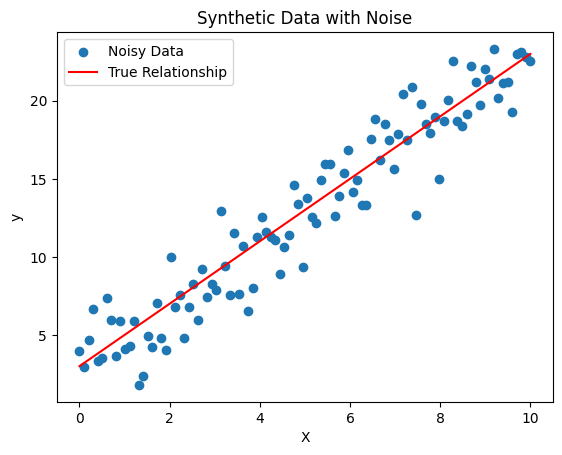

In [5]:
# Generate data
X, y = generate_data(n_samples=100, noise_level=2.0)

# Plot the generated data
plt.scatter(X, y, label='Noisy Data')
plt.plot(X, 2 * X + 3, color='red', label='True Relationship')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Synthetic Data with Noise')
plt.show()

### Split Data into Training and Testing Sets

#### Split the data into training and testing sets to evaluate the model's performance.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train a Linear Regression Model
#### Use scikit-learn to train a linear regression model.

In [7]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the model coefficients
print(f"Slope (m): {model.coef_[0]}")
print(f"Intercept (c): {model.intercept_}")

Slope (m): 2.02416807187519
Intercept (c): 2.639570425966866


### Evaluate the Model
#### Evaluate the model's performance on the test data using metrics like Mean Squared Error (MSE) and R-squared.

In [9]:
from sklearn.metrics import mean_squared_error, r2_score


# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.4881689691607125
R-squared: 0.9325280805909615


##### R-squared: Indicates how well the model explains the variance in the data. Closer to 1 is better.
##### Mean Squared Error (MSE): Measures the average squared difference between the predicted and actual values. Lower is better.

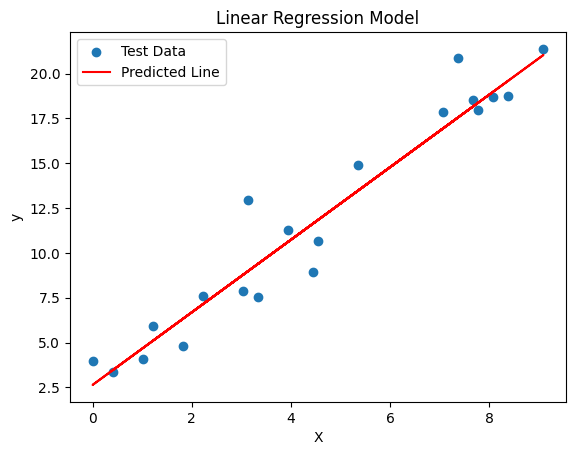

In [10]:
# Plot the results
plt.scatter(X_test, y_test, label='Test Data')
plt.plot(X_test, y_pred, color='red', label='Predicted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression Model')
plt.show()